In [10]:
""" 
# Data analysis inside each month. 
Run first the data-cleaning script, unless you have already clean data 
"""

" Import needed packages"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar

" Decide which month data you want to analyze, selected as YYYYMM "
date = "202204" # YYYYMM identifies the cvs file
save_folder = "" # path to the folder where the cleaned data is saved.
                # Default is the working folder as "".

    
""" The computation part of the script starts from here """

# Imports the cvs data of the month as the "data" variable
if "data_" + date in globals(): # checks if the data is not already loaded
    data = globals()["data_" + date]
else:
    path = save_folder + "cleaned_" + date + ".csv"
    data = pd.read_csv(path) # converts the .cvs file to pandas dataframe

# Extracts year and month for writing the correct header for the graphs
year = date[0:4] # extracts the year
month_number = int(date[4:6]) # extracts the month number
month = calendar.month_name[month_number] # converts month number to name
date_header = ", " + year + " " + month # date header for the graphs

# Turns the entries of the columns "started_at" and "ended_at" 
# into datetime format and the "ride_length" column into timedelta format
if "data_" + date not in globals(): 
    data["started_at"] = pd.to_datetime(data["started_at"])
    data["ended_at"] = pd.to_datetime(data["ended_at"])
    data["ride_length"] = pd.to_timedelta(data["ride_length"])

# Prints some info about the data
data.info()
data.head() # first rows of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272546 entries, 0 to 272545
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   Unnamed: 0          272546 non-null  int64          
 1   ride_id             272546 non-null  object         
 2   rideable_type       272546 non-null  object         
 3   started_at          272546 non-null  datetime64[ns] 
 4   ended_at            272546 non-null  datetime64[ns] 
 5   start_station_name  272546 non-null  object         
 6   start_station_id    272546 non-null  object         
 7   end_station_name    272546 non-null  object         
 8   end_station_id      272546 non-null  object         
 9   start_lat           272546 non-null  float64        
 10  start_lng           272546 non-null  float64        
 11  end_lat             272546 non-null  float64        
 12  end_lng             272546 non-null  float64        
 13  member_casual 

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
0,0,3564070EEFD12711,electric_bike,2022-04-06 17:42:48,2022-04-06 17:54:36,Paulina St & Howard St,515,University Library (NU),605,42.019135,-87.673532,42.052939,-87.673447,member,0 days 00:11:48,2
1,1,0B820C7FCF22F489,classic_bike,2022-04-24 19:23:07,2022-04-24 19:43:17,Wentworth Ave & Cermak Rd,13075,Green St & Madison St,TA1307000120,41.853085,-87.631931,41.881892,-87.648789,member,0 days 00:20:10,6
2,2,89EEEE32293F07FF,classic_bike,2022-04-20 19:29:08,2022-04-20 19:35:16,Halsted St & Polk St,TA1307000121,Green St & Madison St,TA1307000120,41.871840,-87.646640,41.881892,-87.648789,member,0 days 00:06:08,2
3,3,84D4751AEB31888D,classic_bike,2022-04-22 21:14:06,2022-04-22 21:23:29,Wentworth Ave & Cermak Rd,13075,Delano Ct & Roosevelt Rd,KA1706005007,41.853085,-87.631931,41.867491,-87.632190,casual,0 days 00:09:23,4
4,4,5664BCF0D1DE7A8B,electric_bike,2022-04-16 15:56:30,2022-04-16 16:02:11,Halsted St & Polk St,TA1307000121,Clinton St & Madison St,TA1305000032,41.871808,-87.646574,41.882242,-87.641066,member,0 days 00:05:41,5


member_casual          casual          member             All
day_of_week                                                  
0             0 days 21:43:14 1 days 00:52:55 1 days 00:52:55
1             1 days 00:40:23 0 days 23:25:38 1 days 00:40:23
2             2 days 19:25:54 0 days 23:31:39 2 days 19:25:54
3             1 days 00:58:11 1 days 00:20:18 1 days 00:58:11
4             1 days 00:39:53 0 days 21:53:57 1 days 00:39:53
5             5 days 05:45:58 0 days 23:37:03 5 days 05:45:58
6             0 days 23:58:35 0 days 16:11:54 0 days 23:58:35
All           5 days 05:45:58 1 days 00:52:55 5 days 05:45:58


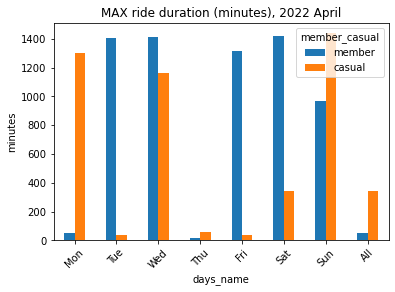

In [17]:
""" Analysis of the MAX ride duration for the selected month """

print("MAX ride duration" + date_header) # table header
pivot_max = pd.pivot_table(data          # pivot table of the dataframe
               , index = "day_of_week"   # rows
               , columns = "member_casual"  # columns
              , values = "ride_length"   # value to aggregate
              , aggfunc = max            # aggregating function
              , margins = True) # if True shows data for All also
print(pivot_max)                # print the pivot table

# converts timedelta entries into minutes
for i in pivot_max.keys():
    pivot_max[i] = (pivot_max[i].dt.days/24/60  # converts days
                + pivot_max[i].dt.seconds/60 # converts hours, minutes, seconds
                )

# adds the "days_name" column to the pivot table
pivot_max["days_name"] = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun","All"]

# plots MAX duration vs day of the week 
# for members and casuals as bar graph 
pivot_max.plot(kind="bar", x = "days_name", y = ["member","casual"]
              , title="MAX ride duration (minutes)" + date_header
               , rot=45)

plt.legend().set_title('') # eliminates the title of the legend
plt.ylabel("minutes") # labels y axis
plt.show() # showe the plot

MIN ride duration, 2022 May
member_casual          casual          member             All
day_of_week                                                  
0             0 days 00:00:01 0 days 00:00:01 0 days 00:00:01
1             0 days 00:00:01 0 days 00:00:01 0 days 00:00:01
2             0 days 00:00:01 0 days 00:00:01 0 days 00:00:01
3             0 days 00:00:01 0 days 00:00:01 0 days 00:00:01
4             0 days 00:00:01 0 days 00:00:01 0 days 00:00:01
5             0 days 00:00:01 0 days 00:00:01 0 days 00:00:01
6             0 days 00:00:01 0 days 00:00:01 0 days 00:00:01
All           0 days 00:00:01 0 days 00:00:01 0 days 00:00:01


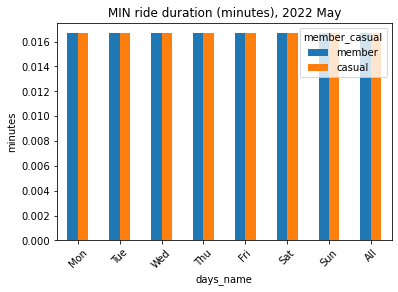

In [46]:
""" Analysis of the MIN ride duration for the selected month """

# calculates the pivot table
print("MIN ride duration" + date_header) # table header
pivot_min = pd.pivot_table(data
               , index = "day_of_week"
               , columns = "member_casual"
              , values = "ride_length"
              , aggfunc = min
              , margins = True)
print(pivot_min)

# converts timedelta entries into minutes
for i in pivot_min.keys():
    pivot_min[i] = pivot_min[i].dt.seconds/60

# adds the "days_name" column to the pivot table
pivot_min["days_name"] = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun","All"]

# plots MAX duration vs day of the week 
# for members and casuals as bar graph 
pivot_min.plot(kind="bar", x = "days_name", y = ["member","casual"]
              , title="MIN ride duration (minutes)" + date_header
               , rot=45)
plt.ylabel("minutes")
plt.show()

Count of rides, 2022 April
member_casual  casual  member     All
day_of_week                          
0                8343   25383   33726
1               10238   30623   40861
2                6881   23858   30739
3               11878   28575   40453
4               11723   25774   37497
5               28241   28022   56263
6               14585   18422   33007
All             91889  180657  272546


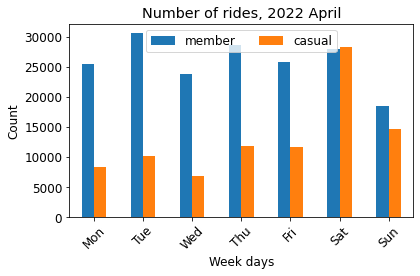

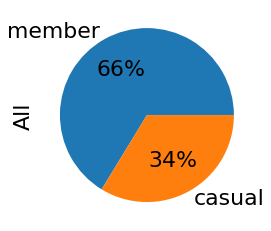

In [20]:
""" Analysis of the number of rides for the selected month """

print("Count of rides" + date_header)
pivot_count = pd.pivot_table(data
               , index = "day_of_week"
               , columns = "member_casual"
              , values = "ride_length" # value is irrelevant
              , aggfunc = len
              , margins = True)
print(pivot_count)

# adds the "days_name" column to the pivot table
pivot_count["days_name"] = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun","All"]

# Plots the number of rides vs day of the week 
# for members and casuals as a bar graph 
plt.rcParams.update({'font.size': 12}) # changes the font size
pivot_count.iloc[:-1,:].plot(kind="bar" # the All row is excluded from plot
            , x = "days_name", y = ["member","casual"]
            , title="Number of rides" + date_header
                 , rot=45)
plt.ylabel("Count")
plt.xlabel("Week days")
plt.legend(loc="upper center" # legend location
           , ncol=3  # legend columns, setting horizontal disposition
          ).set_title('') # removes legend title

plt.tight_layout() # fixes layout around the graph
# saves the graph in the local folder
plt.savefig("Number of rides" + date_header + ".png" 
            , dpi=300) # figure dpi
plt.show()


# Plots the number of total rides 
# for members and casuals as a pie chart 
plt.rcParams.update({'font.size': 22}) # changes the font size
pivot_count.iloc[-1,[0,1]].reindex(
    ["member","casual"] # changes the order and so the colors
    ).plot(
    kind="pie" # type of plot
    , autopct='%1.0f%%' # number of digits of %. ex. 1.2% is 2 digits
)
plt.savefig("Number of rides Pie" + date_header + ".png"
            , dpi=300)
plt.show()


# changes the font size back to normal
plt.rcParams.update({'font.size': 12})

Mean ride duration, 2022 May
member_casual          casual          member             All
day_of_week                                                  
0             0 days 00:29:55 0 days 00:13:19 0 days 00:20:27
1             0 days 00:25:01 0 days 00:12:36 0 days 00:17:03
2             0 days 00:23:20 0 days 00:12:17 0 days 00:15:56
3             0 days 00:25:13 0 days 00:13:02 0 days 00:17:41
4             0 days 00:24:38 0 days 00:12:38 0 days 00:17:43
5             0 days 00:29:35 0 days 00:14:51 0 days 00:22:54
6             0 days 00:30:31 0 days 00:14:34 0 days 00:23:10
All           0 days 00:27:42 0 days 00:13:18 0 days 00:19:37


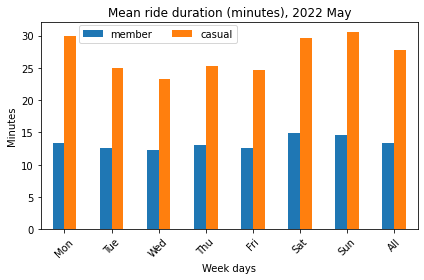

In [108]:
""" Analysis of the MEAN ride duration for the selected month """

print("Mean ride duration" + date_header)
pivot_mean = pd.pivot_table(data
               , index = "day_of_week"
               , columns = "member_casual"
              , values = "ride_length"
              , aggfunc = lambda x: x.mean().round('1s')
              , margins = True)
print(pivot_mean)

for i in pivot_mean.keys():
    pivot_mean[i] = pivot_mean[i].dt.seconds/60

pivot_mean["days_name"] = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun","All"]

pivot_mean.iloc[:,[0,1,3]].plot(kind="bar", x = "days_name"
                , y = ["member","casual"]
                , title="Mean ride duration (minutes)" + date_header
                , rot=45)
plt.ylabel("Minutes")
plt.xlabel("Week days")
plt.legend(loc=[0.1,0.9], ncol = 3).set_title("")

plt.tight_layout()
plt.savefig("Mean ride duration (minutes)" + date_header + ".png",dpi=300)
plt.show()

Mode ride duration, 2022 May
member_casual          casual          member             All
day_of_week                                                  
0             0 days 00:09:44 0 days 00:05:31 0 days 00:09:44
1             0 days 00:07:47 0 days 00:03:48 0 days 00:06:36
2             0 days 00:06:34 0 days 00:04:58 0 days 00:07:04
3             0 days 00:08:37 0 days 00:04:23 0 days 00:08:37
4             0 days 00:09:03 0 days 00:05:02 0 days 00:05:28
5             0 days 00:09:47 0 days 00:05:02 0 days 00:07:57
6             0 days 00:10:40 0 days 00:00:02 0 days 00:00:02
All           0 days 00:09:35 0 days 00:05:02 0 days 00:06:45


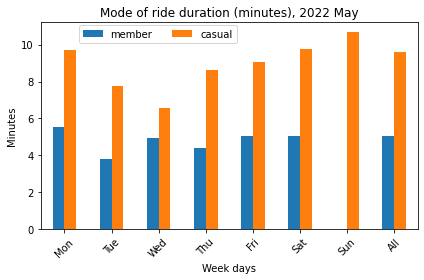

In [109]:
""" Analysis of the MODE of the ride duration for the selected month """

print("Mode ride duration" + date_header)
pivot_mode = pd.pivot_table(data
               , index = "day_of_week"
               , columns = "member_casual"
              , values = "ride_length"
              , aggfunc = lambda x: x.mode()[0]
              , margins = True)
print(pivot_mode)

for i in pivot_mode.keys():
    pivot_mode[i] = pivot_mode[i].dt.seconds/60

pivot_mode["days_name"] = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun","All"]
pivot_mode.iloc[:,[0,1,3]].plot(kind="bar", x = "days_name"
                , y = ["member","casual"]
                , title="Mode of ride duration (minutes)" + date_header
                , rot=45)
plt.ylabel("Minutes")
plt.xlabel("Week days")
plt.legend(loc=[0.1,0.9], ncol=2).set_title("")

plt.tight_layout()
plt.savefig("Mode of ride duration (minutes)" + date_header + ".png", dpi=300)
plt.show()

In [124]:
""" 
Summary table of the ride duration for the selected month 
Casuals vs Members
Listed: MAX, MIN, Count, MODE, MEAN 
"""

print("Summary Table for member_vs_casual, ride duration" + date_header)
summary = pd.pivot_table(data
               , index = "member_casual"
              , values = "ride_length"
              , aggfunc = [max, min, len, lambda x: x.mode()[0]]
              , margins = True)
pivot_mean = pd.pivot_table(data
               , index = "member_casual"
              , values = "ride_length"
              , aggfunc = lambda x: x.mean().round(freq='s')
              , margins = True)

summary["mean"]= pivot_mean['ride_length']
summary
#pivot_mean.keys()
summary_vs = summary.rename( 
    columns={'<lambda>': 'mode', "len" : 'count'}
    )
summary_vs 

Summary Table for member_vs_casual, ride duration, 2022 May


,max,min,count,mode,mean
,ride_length,ride_length,ride_length,ride_length,
member_casual,,,,,
casual,7 days 10:42:58,0 days 00:00:01,220232,0 days 00:09:35,0 days 00:27:42
member,1 days 00:35:38,0 days 00:00:01,282284,0 days 00:05:02,0 days 00:13:18
All,7 days 10:42:58,0 days 00:00:01,502516,0 days 00:06:45,0 days 00:19:37


In [63]:
""" 
Summary table of the ride duration for the selected month 
aggregated for the days of the week. 
Listed: MAX, MIN, Count, MODE, MEAN 
"""

print("Summary Table for days of the week, ride duration" + date_header)
summary = pd.pivot_table(data
               , index = "day_of_week"
              , values = "ride_length"
              , aggfunc = [max, min, len, lambda x: x.mode()[0]]
              , margins = True)
pivot_mean = pd.pivot_table(data
               , index = "day_of_week"
              , values = "ride_length"
              , aggfunc = lambda x: x.mean().round(freq='s')
              , margins = True)

summary["mean"]= pivot_mean['ride_length']
summary
#pivot_mean.keys()
summary_week = summary.rename( 
    columns={'<lambda>': 'mode', "len" : 'count'}
    )
summary_week

Summary Table for days of the week,  ride duration, 2022 April


,max,min,count,mode,mean
,ride_length,ride_length,ride_length,ride_length,
day_of_week,,,,,
0,1 days 00:52:55,0 days 00:00:01,33726,0 days 00:03:59,0 days 00:13:53
1,1 days 00:40:23,0 days 00:00:01,40861,0 days 00:04:18,0 days 00:13:39
2,2 days 19:25:54,0 days 00:00:01,30739,0 days 00:04:43,0 days 00:12:43
3,1 days 00:58:11,0 days 00:00:01,40453,0 days 00:06:07,0 days 00:15:09
4,1 days 00:39:53,0 days 00:00:01,37497,0 days 00:05:07,0 days 00:14:33
5,5 days 05:45:58,0 days 00:00:01,56263,0 days 00:05:23,0 days 00:22:28
6,0 days 23:58:35,0 days 00:00:01,33007,0 days 00:06:22,0 days 00:19:27
All,5 days 05:45:58,0 days 00:00:01,272546,0 days 00:04:18,0 days 00:16:27


SUM ride duration, 2022 May
member_casual  casual  member   All days_name
day_of_week                                  
0                 779     459  1239       Mon
1                 467     420   887       Tue
2                 287     305   593       Wed
3                 445     372   818       Thu
4                 421     292   714       Fri
5                 883     367  1251       Sat
6                 951     387  1339       Sun


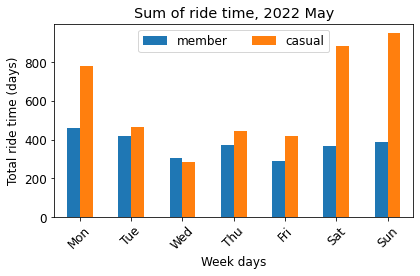

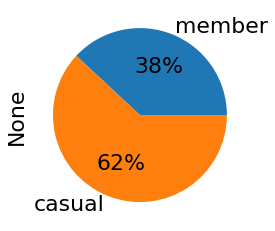

In [135]:
""" Analysis of the TOTAL ride duration for the selected month """

print("SUM ride duration" + date_header)
summary_sum = pd.pivot_table(data
               , index = "day_of_week"
               , columns = "member_casual"
              , values = "ride_length"
              , aggfunc = sum
              , margins = False)
summary_sum["All"] = summary_sum["casual"] + summary_sum["member"]
# print(summary_sum)

summary_sum["days_name"] = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
summary_sum["casual"] = summary_sum["casual"].dt.days
summary_sum["member"] = summary_sum["member"].dt.days
summary_sum["All"] = summary_sum["All"].dt.days
print(summary_sum)

myplot = summary_sum.iloc[:,[0,1,3]].plot(kind = "bar"
                          , x = "days_name"
                          , y = ["member","casual"]
                          , title = "Sum of ride time" + date_header
                          , rot=45)
myplot.set(xlabel="Week days", ylabel="Total ride time (days)")
plt.legend(loc="upper center", ncol=2).set_title("")
plt.tight_layout()
plt.savefig("Sum of ride time" + date_header + ".png", dpi=300)
plt.show()

plt.rcParams.update({'font.size': 22})
summary_sum.iloc[:,[0,1]].sum().reindex(["member","casual"]).plot(kind="pie", autopct='%1.0f%%')
plt.savefig("Sum of ride time Pie" + date_header + ".png"
            , dpi=300)
plt.show()
plt.rcParams.update({'font.size': 12})

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


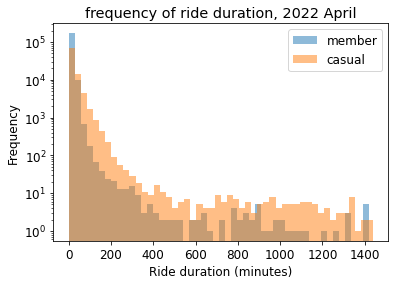

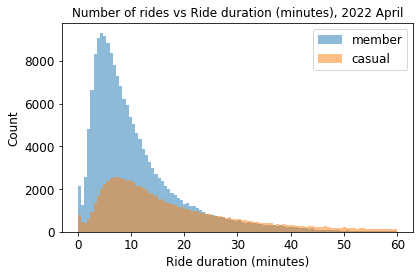

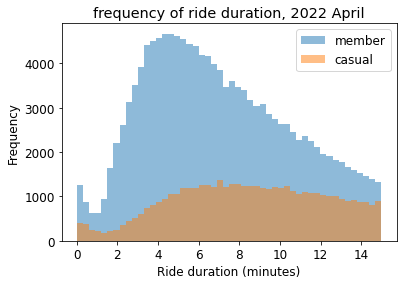

In [21]:
" HISTOGRAM for the ride duration "

" Prepares the data for the histogram "
data_cut = data[["member_casual","ride_length","day_of_week"]] # selected columns
data_casual = data_cut.groupby("member_casual").get_group("casual") # data just for casuals
data_member = data_cut.groupby("member_casual").get_group("member") # data just for members
data_casual.loc[:,"ride_length"] = ( # converts timedelta data to minutes
                        data_casual["ride_length"].dt.seconds/60 # h:m:s to minutes
                        + data_casual["ride_length"].dt.days/24/60) #days to minutes
data_member.loc[:,"ride_length"] = ( # converts timedelta data to minutes
                        data_member["ride_length"].dt.seconds/60
                        + data_member["ride_length"].dt.days/24/60) # h:m:s to minutes
    


" Plots the histogram "
data_member.ride_length.plot( # for members
    kind="hist", bins = 50, log=True, alpha=0.5, label="member",
    title="frequency of ride duration" + date_header)
data_casual.ride_length.plot( # for casuals
    kind="hist", bins = 50, log=True, alpha=0.5, label="casual")
plt.legend(loc="upper right")
plt.xlabel("Ride duration (minutes)")
plt.show()

" Plots the histogram with 60 minutes max ride duration"
max_range = 60  # minutes
data_member.ride_length[data_member.ride_length < max_range].plot(
    kind="hist", bins = 100, log=False, alpha=0.5, label="member",
    title="frequency of ride duration" + date_header)
data_casual.ride_length[data_casual.ride_length < max_range].plot(
    kind="hist", bins = 100, log=False, alpha=0.5, label="casual")
plt.legend(loc="upper right")
plt.xlabel("Ride duration (minutes)")
plt.ylabel("Count")
plt.title("Number of rides vs Ride duration (minutes)" + date_header, 
         fontsize = 12)
plt.tight_layout()
plt.savefig("Frequency of ride duration" + date_header + ".png", dpi=300)
plt.show()

" Plots the histogram with 15 minutes max ride duration"
max_range = 15  # minutes
data_member.ride_length[data_member.ride_length < max_range].plot(
    kind="hist", bins = 50, log=False, alpha=0.5, label="member",
    title="frequency of ride duration" + date_header)
data_casual.ride_length[data_casual.ride_length < max_range].plot(
    kind="hist", bins = 50, log=False, alpha=0.5, label="casual")
plt.legend(loc="upper right")
plt.xlabel("Ride duration (minutes)")
plt.show()

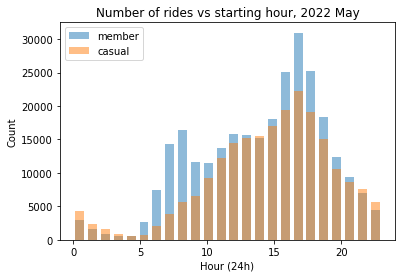

In [104]:
" Graph of number of rides vs starting hour "

# converts datetime data to hour
hour_member = data.started_at[data.member_casual == "member"].dt.hour
hour_casual = data.started_at[data.member_casual == "casual"].dt.hour

# plots the graphic
hour_member.plot(kind="hist", bins = 24, log=False
                 , alpha=0.5, label="member", rwidth=0.7)
hour_casual.plot(kind="hist", bins = 24, log=False
                 , alpha=0.5, label="casual", rwidth=0.7)
plt.xlabel("Hour (24h)")
plt.ylabel("Count")
plt.legend(loc="upper left")
plt.title("Number of rides vs starting hour" + date_header)
plt.savefig("Starting hour" + date_header + ".png", dpi=300)
plt.show()

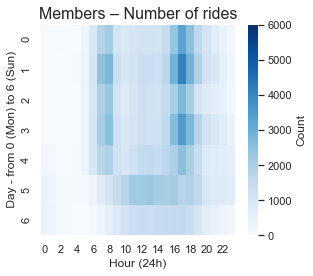

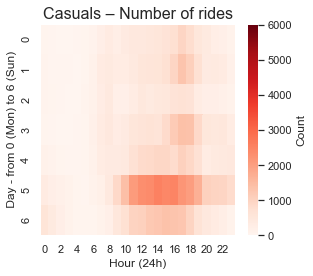

In [22]:
" Heatmap of number of rides vs starting hour and day of the week "

# imports packages needed for the heatmap
import seaborn 
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import MaxNLocator

# prepares the data for the heatmaps
data["starting_hour"] = data["started_at"].dt.hour # converts datetime data to hour
day_hour_member = pd.pivot_table(  # pivot table for members
                            data[data.member_casual == "member"]
                           , index = "day_of_week"
                           , columns = "starting_hour"
                           , values = "ride_id"
                           , aggfunc = len)
day_hour_casual = pd.pivot_table(  # pivot table for casuals
                            data[data.member_casual == "casual"]
                           , index = "day_of_week"
                           , columns = "starting_hour"
                           , values = "ride_id"
                           , aggfunc = len)

# sets the image size and aspect ratio XY
image_size = 4
seaborn.set(rc={'figure.figsize':(image_size*1.125,image_size)})

" Plots the Heatmaps for members in blue "
seaborn.heatmap(day_hour_member, cmap="Blues" #, norm=LogNorm() # uncomment for log scale
           , cbar_kws={'label': 'Count'}
           , vmin=0, vmax=6000)
plt.xlabel("Hour (24h)")
plt.ylabel(" Day - from 0 (Mon) to 6 (Sun)")
plt.title("Members – Number of rides", fontsize=16)
plt.tight_layout()
plt.savefig("heatmap_Members_" + date_header + ".png",dpi=300)
plt.show()

" Plots the Heatmaps for casuals in red "
seaborn.heatmap(day_hour_casual, cmap="Reds"#, norm=LogNorm() # uncomment for log scale
           , cbar_kws={'label': 'Count'}
           , vmin=0, vmax=6000)
plt.xlabel("Hour (24h)")
plt.ylabel(" Day - from 0 (Mon) to 6 (Sun)")
plt.title("Casuals – Number of rides", fontsize=16)
plt.tight_layout()
plt.savefig("heatmap_Casuals_" + date_header + ".png",dpi=300)
plt.show()

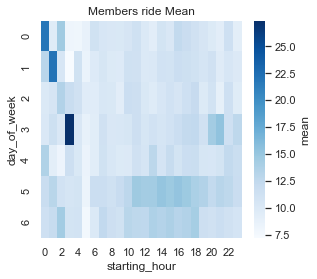

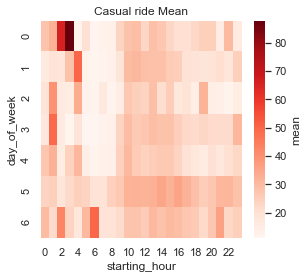

In [23]:
" Heatmap of mean ride duration vs starting hour and day of the week "

# imports packages needed for the heatmap
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import MaxNLocator

# prepares the data for the heatmaps
data["starting_hour"] = data["started_at"].dt.hour # converts datetime data to hour
day_hour_member_mean = pd.pivot_table( # pivot table for members
                             data[data.member_casual == "member"]
                           , index = "day_of_week"
                           , columns = "starting_hour"
                           , values = "ride_length"
            , aggfunc = lambda x : x.mean().seconds/60) # mean in minutes
day_hour_casual_mean = pd.pivot_table( # pivot table for casuals
                             data[data.member_casual == "casual"]
                           , index = "day_of_week"
                           , columns = "starting_hour"
                           , values = "ride_length"
            , aggfunc = lambda x : x.mean().seconds/60) # mean in minutes


# Plots the Heatmaps for members in blue
sns.heatmap(day_hour_member_mean, cmap="Blues"
           ,cbar_kws={'label': 'mean'})
plt.title("Members ride Mean")
plt.show()

# Plots the Heatmaps for casuals in red
sns.heatmap(day_hour_casual_mean, cmap="Reds"
           ,cbar_kws={'label': 'mean'})
plt.title("Casual ride Mean")
plt.show()

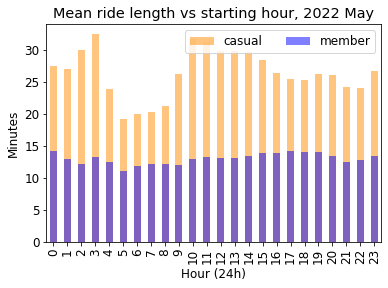

In [143]:
" Graph of mean ride duration vs starting hour "

# bar plot for members
day_hour_member_mean.mean().plot(kind = "bar"  # type of plot
                                 , alpha=0.5   # transparency level
                                 , label="member" # data label
                                 , color="blue")  # plot color
# bar plot for casuals
day_hour_casual_mean.mean().plot(kind = "bar"  # type of plot
                                 , alpha=0.5   # transparency level
                                 , label="casual" # data label
                                 , color="darkorange") # plot color

# plot options
plt.xlabel("Hour (24h)")
plt.ylabel("Minutes")
plt.legend(ncol=2, loc="upper right")
plt.title("Mean ride length vs starting hour"+date_header)
plt.savefig("Mean vs starting hour"+date_header+".png",dpi=300)
plt.show()

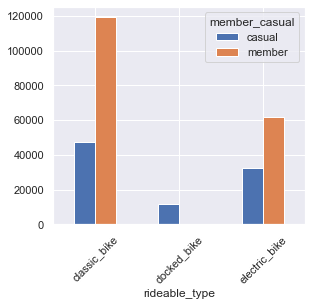

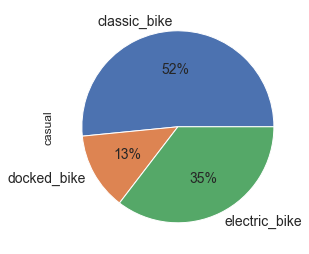

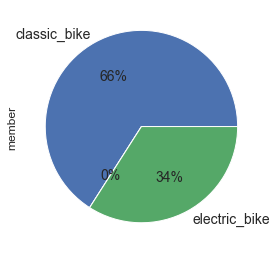

In [24]:
" Graphs for the different rideable types: classic, electric or docked bike "

# pivot table for the number of rides vs rideable_type and member_casual
day_hour_type = pd.pivot_table(data
                           , index = "rideable_type"
                           , columns = "member_casual"
                           , values = "ride_id"
                           , aggfunc = len
                            ).fillna(0)

# plot a bar graph for the number of rides vs rideable_type and member_casual
day_hour_type.plot(kind="bar", rot=45)
plt.show()


# Pie chart for casuals, for the different rideable_type %
plt.rcParams.update({'font.size': 22}) # changes the global font size
day_hour_type.casual.plot(kind="pie"   # type of plot
                          , autopct='%1.0f%%' # digits for % number
                          , textprops={'fontsize': 14}) # label fontsize
plt.tight_layout() # fix the layout
plt.savefig("RideableType_casual"+date_header, dpi=300) # save image
plt.show() # show image

# Pie chart for members, for the different rideable_type %
day_hour_type.member.plot(kind="pie"   # type of plot
                          , autopct='%1.0f%%' # digits for % number
                          , textprops={'fontsize': 14}) # label fontsize
plt.tight_layout() # fix the layout
plt.savefig("RideableType_member"+date_header, dpi=300) # save image
plt.show() # show image

# changes the global font size back to normal
plt.rcParams.update({'font.size': 12})

In [194]:
""" 
Heatmaps of number of rides for for different membership types 
and rideable types vs ride starting_hour and day_of_week
"""

" Prepares the data "
# pivot table for members and classic_bike
day_hour_member_classic = pd.pivot_table( 
    data[data.member_casual == "member"]
    [data.rideable_type == "classic_bike"]
                           , index = "day_of_week"
                           , columns = "starting_hour"
                          , values = "ride_id"
                          , aggfunc = len)
# pivot table for members and electric_bike
day_hour_member_electric = pd.pivot_table(
    data[data.member_casual == "member"]
    [data.rideable_type == "electric_bike"]
                           , index = "day_of_week"
                           , columns = "starting_hour"
                          , values = "ride_id"
                          , aggfunc = len)
# pivot table for casuals and electric_bike
day_hour_casual_electric = pd.pivot_table(
    data[data.member_casual == "casual"]
    [data.rideable_type == "electric_bike"]
                           , index = "day_of_week"
                           , columns = "starting_hour"
                          , values = "ride_id"
                          , aggfunc = len)
# pivot table for casuals and classic_bike or docked_bike
day_hour_casual_classic = pd.pivot_table(
    data[data.member_casual == "casual"]
    [data.rideable_type == ("classic_bike" or "docked_bike")]
                           , index = "day_of_week"
                           , columns = "starting_hour"
                          , values = "ride_id"
                          , aggfunc = len)


" Plot the 4 heatmaps "

# Heatmap for members and classic_bike
seaborn.heatmap(day_hour_member_classic # data being plotted
                , cmap="Blues"          # plot color
               #, norm=LogNorm()        # uncomment for log scale
                , cbar_kws={'label': 'Count'} # colorbar label
                )
plt.xlabel("Hour (24h)")
plt.ylabel(" Day - from 0 (Mon) to 6 (Sun)")
plt.title("Members with classic bike – Number of rides")
plt.savefig("heatmap_Members_Classic" + date_header + ".png",dpi=300)
plt.show()

# Heatmap for members and electric_bike
seaborn.heatmap(day_hour_member_electric  # data being plotted
                , cmap="Greens"           # plot color
               #, norm=LogNorm()          # uncomment for log scale
                ,cbar_kws={'label': 'Count'} # colorbar label
                )
plt.xlabel("Hour (24h)")
plt.ylabel(" Day - from 0 (Mon) to 6 (Sun)")
plt.title("Members with electric bike – Number of rides")
plt.savefig("heatmap_Members_Electric" + date_header + ".png",dpi=300)
plt.show()

# Heatmap for casuals and electric_bike
seaborn.heatmap(day_hour_casual_electric  # data being plotted
                , cmap="Oranges"          # plot color
               #, norm=LogNorm()          # uncomment for log scale
                ,cbar_kws={'label': 'Count'} # colorbar label
                )
plt.xlabel("Hour (24h)")
plt.ylabel(" Day - from 0 (Mon) to 6 (Sun)")
plt.title("Casuals with electric bike – Number of rides")
plt.savefig("heatmap_Casuals_Electric" + date_header + ".png",dpi=300)
plt.show()

# Heatmap for casuals and classic_bike or docked_bike
seaborn.heatmap(day_hour_casual_classic  # data being plotted
                , cmap="Reds"            # plot color
               #, norm=LogNorm()         # uncomment for log scale
                ,cbar_kws={'label': 'Count'} # colorbar label
                )
plt.xlabel("Hour (24h)")
plt.ylabel(" Day - from 0 (Mon) to 6 (Sun)")
plt.title("Casuals with classic bike – Number of rides")
plt.savefig("heatmap_Casuals_Classic" + date_header + ".png",dpi=300)
plt.show()